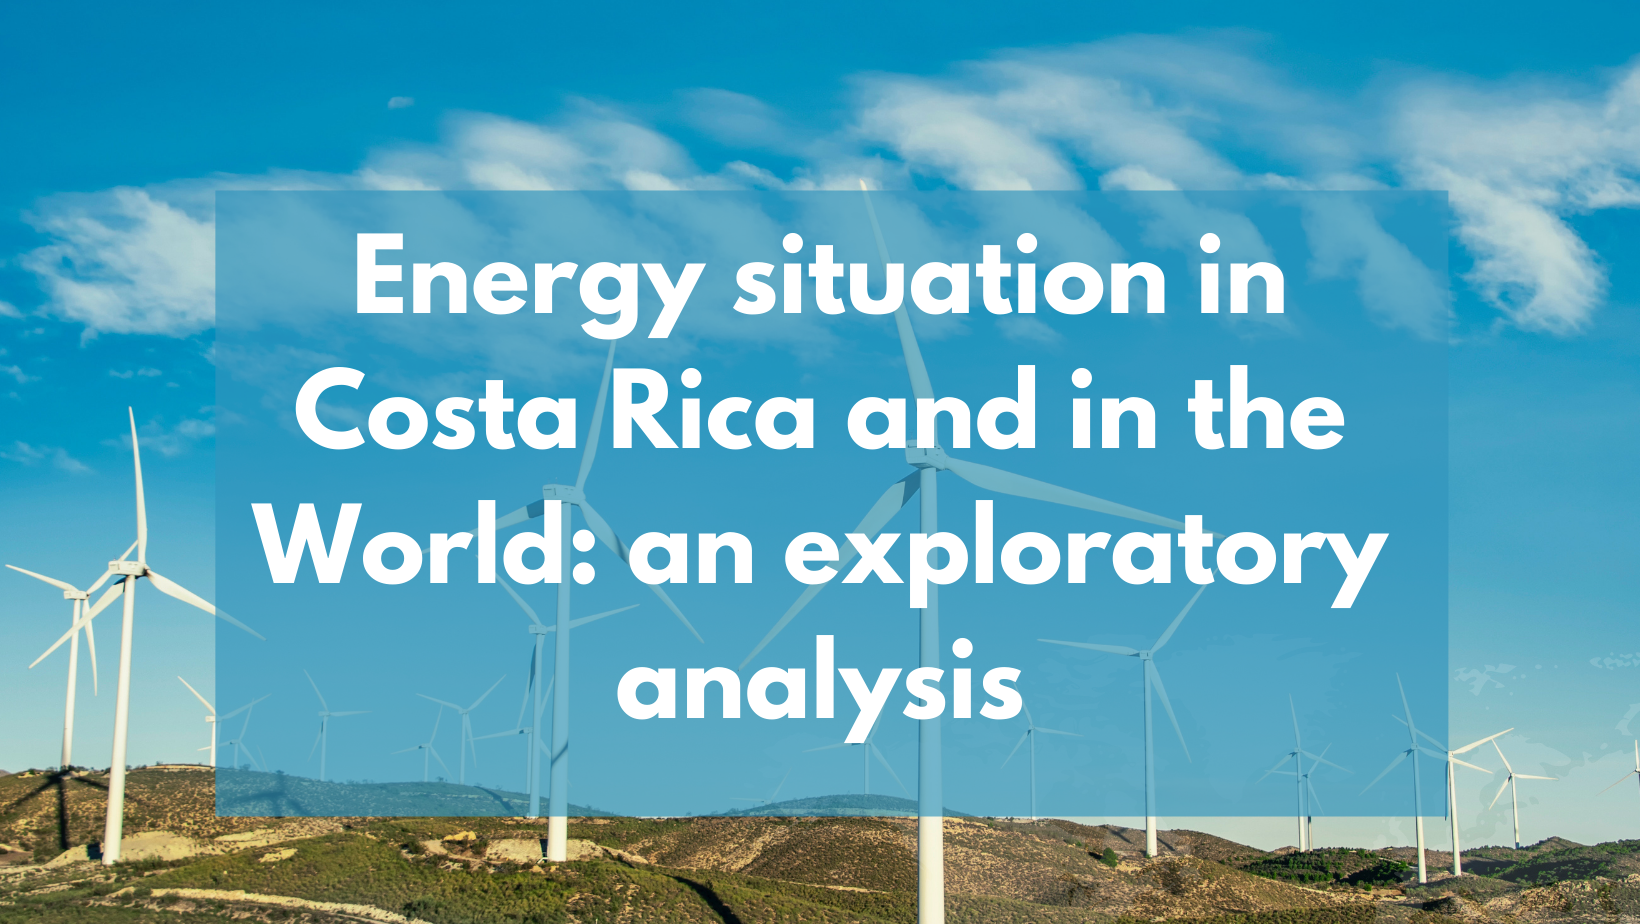

# Energy situation in Costa Rica and in the World: an exploratory analysis

**Table of Contents**
* [Libraries and Connections](#Connections)
* [Introduction](#Introduction)  
* [Let's take a look at Costa Rica](#CostaRica)
* [Let's zoom out at the world](#World)
* [Conclusion](#Conclusion)
* [References](#References)

<a class="anchor" name="Connections"></a>
## Libraries and Connections

In [1]:
## Required Libraries 
#! pip install snowflake-connector-python==2.3.8
#! pip install plotly==5.6.0
#! pip install "snowflake-connector-python[pandas]"

In [2]:
## Import Libraries
import pandas as pd
import plotly.express as px
import snowflake.connector
import plotly.graph_objs as go
import getpass

In [3]:
## SnowFlake Password
passwordSnowFlake = getpass.getpass()

········


In [4]:
## Create SnowFlake connection
ctx = snowflake.connector.connect(
    user='jsolano97',
    password=passwordSnowFlake,
    account='xs69695.east-us-2.azure',
    warehouse='ULACITDATACHALLENGE',
    database='NATIONALBALANCECLEAN',
    schema='PUBLIC'
    )

curs = ctx.cursor()
curs.execute("USE ROLE SYSADMIN")

<a class="anchor" name="Introduction"></a>
## Introduction 


Universal access to affordable and clean energy access by 2030 is the seventh  Sustainable Development Goals goals defined by the United Nations. With the current situation of increasing energy demand, rising energy prices, and reinforcement of countermeasures for global warming, renewable energy sources have taken the spotlight. The world faces two energy problems: most of our energy production still produces greenhouse gas emissions, and hundreds of millions lack access to energy entirely. 

Furthermore, the energy sector is a key sector in the sustainable development of a country. The construction of a nation that seeks the quality of life of the inhabitants of its country requires to a great extent the proper management of economic resources and environments which are largely influenced by development patterns of the country's energy sector. 

Costa Rica is no stranger of this situation. In fact, Costa Rica’s electricity grid is almost entirely fuelled by renewable energies. Hydroelectric plants are the main source, but there is also a significant portion of geothermal and biomass energy, as well as more recently integrated wind, solar and biogas power

To face this challenges, Costa Rica also has a diversity of national policy instruments that serve as guidance, such as the 2015-2030 VII National Energy Plan, the 2018-2030 National Electric Transport Plan, the 2018-2050 Decarbonisation Plan, the international commitment to implement the Sustainable Development Goals (SDGs) and the Paris Climate Agreement.

In this notebook, an exploratory analysis of the energy situation in Costa Rica will be presented. Furthermore an overview and comparative examinatation with the energy situation in the world will be given.

<a class="anchor" name="CostaRica"></a>
## Let's take a look at Costa Rica

**From where we take our energy**

It is necessary to stablish how the trends of production, consumption and availability of energy behave. And if these go hand by hand with a development that seeks the environmental and economic sustainability. In this way, a list of challenges in the matter can be drawn up.

When the trend of primary energy production in the country is analyzed.
It is shown that for the last 10 years, hydroelectric energy is the main source of energy generation in the country.(See figure below)

The reason of this may be that Costa Rica is one of the richest countries in hidric resources in the world. And since the last 20 years, the enormous hydroelectric potential of the country has motivated entrepreneurs and local governments to build more hydroelectric plants to bring electricity to the entire national territory. 


In [5]:
sqlGENERACIONXTIPOFUENTE = 'select * from "DATACHALLENGEWAREHOUSE"."COSTARICACONSUMPTION"."GENERACIONXTIPOFUENTE"'
curs.execute(sqlGENERACIONXTIPOFUENTE)
DFgeneracionxtipo= curs.fetch_pandas_all()

fig = px.line(DFgeneracionxtipo, x="YEARD", y="AMOUNTTJ", color="TIPO",markers=True,
  labels={
                     "YEARD": "Year",
                     "AMOUNTTJ": "Terajules (TJ)",
                     "TIPO": "Fuente de generación"
                 },
                title="Distribution of energy production by source in Costa Rica,2010-2018 ")
fig.show()

It is also worth noting the behavior of wind energy, since it is the type of generation source with the greatest tendency to increase, in 2017, it surpassed geothermal energy and became the second largest source of energy production in the country. Diversifying our electrical matrix is of vital importance, since depending only on hydroelectric energy can mean long-term risks, due to the effects of climate change and drought that are affecting the flow of rivers and water reserves. 

If we look closely to 2019 (the last year with data available), 68% of the energy generated in the country was of hydroelectric origin; 13.2% of geothermal origin, 15.7% of wind origin and 1.48% of biomass. Only 0.83% of the total produced was generated with a thermal source; that means that in 2019, 99.17% of the energy generated in the country came from non-fossil sources. As you can see in the graphic below

In [6]:
fig = px.pie(DFgeneracionxtipo.query("YEARD == '2019'"), values='AMOUNTTJ', names='TIPO',
          labels={
                     "YEARD": "Year",
                     "AMOUNTTJ": "Terajulios (TJ)",
                     "TIPO": "Fuente de generación"
                 },
                title="Distribution of energy production by source in Costa Rica in 2019")   
fig.show()

**Renewables vs Fossil fuels**

The electricity development model that Costa Rica has consolidated allows it to generate energy with very high percentages of renewable sources, as you can see in the chart below.

In [7]:
sqlGENERACIONXTIPOFUENTECOLS = 'select * from "DATACHALLENGEWAREHOUSE"."COSTARICACONSUMPTION"."GENERACIONXTIPOFUENTECOLS"'
curs.execute(sqlGENERACIONXTIPOFUENTECOLS)
dfGENERACIONXTIPOFUENTECOLS = curs.fetch_pandas_all()

fig = go.Figure(data=go.Scatter(x=dfGENERACIONXTIPOFUENTECOLS['YEARD'], y=dfGENERACIONXTIPOFUENTECOLS['TOTALRENEWABLE'],name="RENEWABLE"))
fig.add_trace(go.Scatter(x=dfGENERACIONXTIPOFUENTECOLS['YEARD'], y=dfGENERACIONXTIPOFUENTECOLS['TERMICA'], name="NonRENEWABLE",
                    line_shape='linear'))
fig.update_layout(title='Energy production by renewables and non renewables in Costa Rica, 2010-2018',
                   xaxis_title='Year',
                   yaxis_title='Terajules (TJ)')
fig.show()


The generation of energy through fossil sources has decreased significantly over the last 10 years. On the contrary, the generation of clean and renewable energy has come to cover almost all of the electricity produced in the country. From 2010 to 2019, the percentage of the energy consumed in the country from renewable sources represented more than 93% of total energy demand. 

Furthermore, in 2018, Costa Rica met the country's electricity demand for 300 days with 100% energy from clean and renewable sources (Gobierno de Costa Rica, 2018), which is an important achievement that has been widely recognized worldwide. Having a renewable electrical matrix represents a comparative and competitive advantage for attracting capital and investment and, in general, for future sustainable energy development.

**How our energy is consumed**

For the year 2018, the patterns of energy consumption followed the trend of the last 5 years (As you can see in the following graph), where the highest consumption is attributed to the transport sector, with a contribution of 53.7% for a total of 91231 TJ. For this sector, there is an increase of 2.4% compared to 2017.

In [8]:
sqlCONSUMOFINALPORSECTOR = 'select * from "DATACHALLENGEWAREHOUSE"."COSTARICACONSUMPTION"."CONSUMOFINALPORSECTOR"'
curs.execute(sqlCONSUMOFINALPORSECTOR)
dfCONSUMOFINALPORSECTOR = curs.fetch_pandas_all()

fig = px.bar(dfCONSUMOFINALPORSECTOR, x="YEARD",y="AMOUNT",color="TIPO",
             labels={
                     "YEARD": "Year",
                     "AMOUNT": "Terajules (TJ)",
                     "TIPO": "Sector"
                 },
                title="Distribution of total energy consumption by sector in Costa Rica, 2010-2018 ")
fig.show()

On the other hand, the contribution of the industrial sector stands out, which is the second sector with the highest demand for energy in the country.

In 2018, the industrial sector had a decrease of 2.05% compared to 2017.
This behavior can be related to the growing trend of the industry to introduce greater efficiency in its processes, such as the use of biomass for boilers, implementation of solar panels, change of obsolete technologies, this thanks to the existing relationship between the costs of production and the environmental efficiency of the processes.



**Industrial Sector**

A more in detailed analysis of the industrial sector is shown is the graphic below.





In [9]:
SQLINDUSTRIAPORSECTOR = 'select * from "DATACHALLENGEWAREHOUSE"."COSTARICACONSUMPTION"."INDUSTRIAPORSECTOR"'
curs.execute(SQLINDUSTRIAPORSECTOR)
dfINDUSTRIAPORSECTOR = curs.fetch_pandas_all()

fig = px.sunburst(dfINDUSTRIAPORSECTOR, path=['DESCRIPCION','YEARD'], values='AMOUNT',color='DESCRIPCION',
                  title="Distribution of energy consumption by the industrial sector in Costa Rica, 2010-2018 ")
fig.show()

The food and tobacco production industry has been the one with the highest energy demand in the last 8 years. Followed by other industries and the production of wood.

In 2018, the production of food and tobacco consumed a total of 20,442 TJ, representing 52.96% of the total energy consumed by the industry sector. Other industries represented 24.24% and wood production 12.95% with a consumption of 5086 TJ in 2018 .

However, since these are mostly powered by renewable sources, they do not mean a directly negative impact on the environment in terms of greenhouse gas emissions produced directly by their energy consumption. 

**Transport Sector**

Having a better look at the sector with the highest energy demand in the country. You can see in the following graph that the land transport is the one with the highest proportion in energy consumption. In 2018, land transport represented the 89,82% of the total energy consumed by the entire transport sector.

In [10]:
SQLTRANSPORTEPORSECTOR = 'select * from "DATACHALLENGEWAREHOUSE"."COSTARICACONSUMPTION"."TRANSPORTEPORSECTOR"'
curs.execute(SQLTRANSPORTEPORSECTOR)
dfSQLTRANSPORTEPORSECTOR = curs.fetch_pandas_all()
dfSQLTRANSPORTEPORSECTOR =dfSQLTRANSPORTEPORSECTOR.query("YEARD == '2018'")
fig = px.sunburst(dfSQLTRANSPORTEPORSECTOR, path=['SECTOR', 'SUBSECTOR','DESCRIPCION'], values='AMOUNT',color='SECTOR',
                  title="Distribution of energy consumption by the transport sector in Costa Rica, 2010-2018 ")
fig.show()

Private transportation, and more specifically, private cars, correspond to the subsector with the highest proportion of energy consumed. Private cars alone, represented in 2018, 14,24% out the total energy consumed in the country. With a total of 24251 TJ, private cars consumed more energy than all the food and tobacco production industry in Costa Rica, and more than the double of all the energy demanded by the air transport sector.

The pattern of energy consumption by the transport sector is closely related to the progressive increase in the country's vehicle fleet in recent years. This has important environmental implications in terms of air pollution and global warming. Indeed, studies suggest that the country will not be able to get rid of the use of hydrocarbons due to the needs of the transport sector for at least three decades, so the key to improvement in this aspect points to improving the quality of fuels (Gutierrez, 2015)





**What are we doing about it**

Costa Rica has long been celebrated for its leadership in environmental policy. In 2015, Costa Rica pledged to become carbon neutral (the result of a net zero release of carbon dioxide into the atmosphere) by 2021: the latest chapter in this small Central American country’s contribution to the climate change agenda.

Costa Rica is aiming for “strong progress” by the end of the decade in electrifying transportation to help “dramatically reduce” the nation’s carbon footprint.

<a class="anchor" name="World"></a>
## Let's zoom out at the world

**The inevitable increase of energy demand and the behaviour between Fossil fuels and Renewables** 

As said before, it is necessary to stablish how the trends of production, consumption and availability of energy behave. For many decades, fossil 
fuels such as coal, oil or gas have been major sources of electricity production, but burning carbon fuels produces large amounts of greenhouse gases which cause climate change and have harmful impacts on people’s well-being and the environment. On the other hand, clean energy provides a variety of environmental and economic benefits, including a reduction in air pollution, because it works by producing power without having the release of greenhouse gases like carbon dioxide. A diverse clean energy supply also reduces the dependence on imported fuels (and the associated financial and environmental costs this incurs).

A chart where the global energy demand over the years is presented by technology is shown below

In [11]:
SQLDATATRENDSALLNONULL = 'select * from "DATACHALLENGEWAREHOUSE"."ENERGYTRENDS"."DATATRENDSALLNONULL"'
curs.execute(SQLDATATRENDSALLNONULL)
dfDATATRENDSALLNONULL = curs.fetch_pandas_all()

dfTemp = dfDATATRENDSALLNONULL.groupby(['TECHNOLOGY','YEAR']).sum().reset_index()

fig = px.bar(dfTemp, x="YEAR",y="ROUNDGENERATION",color="TECHNOLOGY",height=950,text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Global annual power generation by technology, 2007-2019',
                   xaxis_title='Year',
                   yaxis_title='GigaWatt (GWh)')
fig.show()

As you can see, power generated by fossil fuel such as coal, natural gas and oil are main sources of energy in the world.
Nevertheless, power generated by fossil fuels are slowly declining over the last two years. While fossil fuel generation dropped, renewables played a bigger role in 2019. Fossil generation is down 1.06% since from 2018 to 2019. In contrast, renewables rose by 4.5% in two years. 

You can see a more detailed change between 2018 and 2019 in the table below. 




In [12]:
SQLDATATRENDSCOMPARISSON = 'select * from "DATACHALLENGEWAREHOUSE"."ENERGYTRENDS"."DATATRENDSCOMPARISSON"'
curs.execute(SQLDATATRENDSCOMPARISSON)
dfDATATRENDSCOMPARISSON = curs.fetch_pandas_all()

dfDATATRENDSCOMPARISSONNEW = dfDATATRENDSCOMPARISSON[['TECHNOLOGY', 'CHANGEPERCENTAGE']]
dfDATATRENDSCOMPARISSONNEW

TECHNOLOGY CHANGEPERCENTAGE
0                        Biogas            1.22%
1      Concentrated solar power           16.77%
2                  Fossil fuels           -1.06%
3             Geothermal energy            2.82%
4               Liquid biofuels           14.78%
5                 Marine energy           -2.60%
6                       Nuclear            2.73%
7   Off-grid Solar photovoltaic            7.71%
8          Offshore wind energy           23.93%
9    On-grid Solar photovoltaic           23.01%
10          Onshore wind energy           11.60%
11   Other non-renewable energy            7.42%
12               Pumped storage           -2.94%
13         Renewable hydropower            1.07%
14    Renewable municipal waste            9.45%
15               Solid biofuels            6.34%

Non-hydro renewables reached 24,8% of total generation in 2019, compared to 23,3% in 2018 and 19,5% in 2009. Wind accounted for 5.3% in 2019, followed by solar (2,5%). The share of renewables jumps to 36,7% in 2019 when including hydro generation.

Moreover, solar has outshined all other technologies in annual generation growth since 2014. For 2014-19 solar generation jumped 70%. Wind generation grew 43% for 2014-19

It is worth noting how diametrically different the global trends behave compared to the energy trends in Costa Rica.

While the world is still heavily dependent on fossil fuels, Costa Rica has been running and meeting its energy demands almost entirely from renewable sources for the past 10 years. 

Which are the behaviors when we analize the rest of the countries or regions in the world?


In [13]:
dfTemp3 = dfDATATRENDSALLNONULL.query("REGION1!='NULL'")
dfRegion = dfTemp3.groupby(['REGION1','YEAR']).sum().reset_index()

fig = px.bar(dfRegion, x="YEAR",y="ROUNDGENERATION",color="REGION1",text_auto='.2s',height=950)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Global annual power consumption by region in the world, 2007-2019',
                   xaxis_title='Year',
                   yaxis_title='GigaWatt (GWh)'
                  )
fig.show()

If we look closely at this data by region, we can see that China, Northen America and Southern Asia are the biggest energy consumers in the world. Moreover, Asia’s demand for electricity has risen swiftly over the past decade and the continent now accounts for half of global generation. 
The region was home to 52% of global power consumption in 2020, up from 40% in 2009

A visual representation by country of the energy demand in 2019 is presented in the following map 

In [20]:
dfTemp2 = dfDATATRENDSALLNONULL.query("YEAR==2019")
df = dfTemp2.groupby(['COUNTRY','COUNTRYCODE','YEAR']).sum().reset_index()


fig = go.Figure(data=go.Choropleth(
    locations = df['COUNTRYCODE'],
    z = df['ROUNDGENERATION'],
    text = df['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorbar_tickprefix = 'GigaWatt (GWh',
    colorbar_title = 'Demand'
))

fig.update_layout(
    title_text='Power consumption by country in 2019',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
     width=1000, height=900
)

fig.show()



China alone approaches 30% total global power generation in 2019. China has been the world’s biggest producer of electricity since 2012 and with 7.5TWh generation in 2019 accounted for 28.3% of the global total. 

It is important to analyze which is the main source of energy generation in these countries where the highest energy consumption in the world is concentrated. These countries and regions dominate global trends, and therefore, they also dominate and contribute greatly with their carbon footprint directly related to their energy consumption.

A more in detailed analysis can be seen in the graphic below

In [21]:
SQLDATATRENDSALLMOSTUSEDTEC = 'select * from "DATACHALLENGEWAREHOUSE"."ENERGYTRENDS"."DATATRENDSALLMOSTUSEDTEC"'
curs.execute(SQLDATATRENDSALLMOSTUSEDTEC)
dfDATATRENDSALLMOSTUSEDTEC = curs.fetch_pandas_all()

fig = px.choropleth(dfDATATRENDSALLMOSTUSEDTEC, locations="COUNTRYCODE",
                    color="TECHNOLOGY", 
                    hover_name="COUNTRY", 
                    color_continuous_scale=px.colors.sequential.Plasma,width=1000, height=900,
                    title="Main source of energy consumption by country in 2019")
fig.show()

It can be seen that the regions with the highest energy demand in the world continue to obtain most of their energy from fossil fuels. 

It should be noted that most of the so-called "developed countries" (regions of Europe and North America) use fossil fuels such as coal as their main source of energy. And that, on the contrary, a significant number of countries called "developing or third world countries" are those that use clean and renewable sources as their main source to meet their energy demands (see regions of Africa and South America) 

The transition to renewable energy in Africa and in South America has been progressing impressively over the last decade, with many countries working to increase renewable energy capacity in recent years.

According to the International Renewable Energy Agency, countries like Egypt, Ethiopia, Kenya, Morocco and South Africa have shown firm commitment towards accelerated use of modern renewable energy and are leading energy transition efforts, while some of Africa’s smaller countries including Cape Verde, Djibouti, Rwanda (United Nations, 2021)

**What about global investments?**

Scaling up renewable energy calls for mobilising a massive investment increase. Renewables bring far reaching benefits in terms of human health, energy access, environmental protection and the response to climate change, along with the potential to create new jobs around the world

In [16]:
SQLENERGYTRENDSINVESTMENT = 'Select * from "DATACHALLENGEWAREHOUSE"."ENERGYTRENDS"."ENERGYTRENDSINVESTMENT" where Investments is not null'
curs.execute(SQLENERGYTRENDSINVESTMENT)
dfENERGYTRENDSINVESTMENT = curs.fetch_pandas_all()

dfINVESTMENT = dfENERGYTRENDSINVESTMENT.groupby(['TECHNOLOGY','YEAR']).sum().reset_index()


fig = px.bar(dfINVESTMENT, x="YEAR",y="INVESTMENTS",color="TECHNOLOGY",text_auto='.2s',height=950)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Global energy investment by technolgy, 2000-2020',
                   xaxis_title='Year',
                   yaxis_title='Investments (Million USD)'
                  )
fig.show()

Yet, as you can see, total global investment in renewables has remained far below its potential. As of 2016, it can be seen how global investments in energy have drastically decreased. It is 2020, the one that presents the greatest change, from 2019 to 2020 there was a decrease of 71,8% in total global investments. This large difference may be due to the pandemic caused by COVID-19, which affected investments in multiple sectors, along with the energy sector energy.

2009 was the year with the highest investment in general, with a total investment of 71,101.45 million dollars. However, 70.6% of that amount was dedicated to investment in fossil fuels. 

The year in which there was the greatest investment for renewable energies was the 2017, with a total of 34109.6 million USD, which represented 67% of the total investments of that year.

Hydropower, wind and solar are the technologies with the highest investment over the years.
In 2012, the global investment in hydropower alone represented 38,3% of total global investments. However, this has been the year in which the greatest investment was dedicated to this sector. For the following year, 2013, investments in Hydropower decreased by 37% 

The biggest year for solar was 2016, with a total of 10634.7 million USD invested. And in the case of wind energy, its investments have remained relatively constant over the years, reaching its maximum peak in 2014, with a total of 7421.5 million USD invested. 

Getting the world on track for net zero emissions by 2050 requires clean energy transition-related investment to accelerate from current levels to around USD 4 trillion annually by 2030 (IEA, 2021). Achieving rapid clean energy transitions depends on enhancing access to low cost finance for clean energy projects, actions and policies must be take this into consideration for major efforts and investments in cleaner energies make a return into the global economy and markets.




**Energy role in the environment and climate change**



As disscused before, burning fossil fuels for electricity generation, heating and transport release large amounts of greenhouse gases into the atmosphere. 

Globally, the use of energy represents by far the largest source of greenhouse gas emissions from human activities. About two thirds of global greenhouse gas emissions are linked to burning fossil fuels for energy to be used for heating, electricity, transport and industry (EEA, 2021). 

In the following figure, a more in detailed description of the CO2 emmissions generated by fossil fuels in power generation is shown


In [17]:
SQLALLCONSUMPTIONROWS = 'Select * from "DATACHALLENGEWAREHOUSE"."WORLDCOMSUMPTION"."ALLCONSUMPTIONROWS"'
curs.execute(SQLALLCONSUMPTIONROWS)
dfALLCONSUMPTIONROWS = curs.fetch_pandas_all()

dfCONSUNMPTION = dfALLCONSUMPTIONROWS.groupby(['TYPE','YEARD']).sum().reset_index()


fig = px.bar(dfCONSUNMPTION, x="YEARD",y="AMOUNT",color="TYPE",text_auto='.2s',height = 600)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Energy sector emissions by source, 2010-2020',
                   xaxis_title='Year',
                   yaxis_title='MtonCO2eq'
                  )
fig.show()

As you can see, since fossil fuels such as carbon and oil are the main sources of power generation in the world. They are aswell the biggest contribuitor of CO2 emissions in the world directly related to energy generation.

Nevertheless power sector CO2 emissions dropped 30,8% from 2019 to 2020, marking the biggest year-on-year decline in at least a decade. This was mainly because, after rising steadily for decades, global carbon dioxide emissions fell in 2020, as the COVID-19 pandemic put down economic and social activities worldwide.

Global efforts so far to mitigate climate change culminated in the Paris Agreement in 2015. Through the agreement, 195 countries adopted the first-ever universal and legally binding, global climate deal. The target of the agreement, limiting the global average temperature rise to well below 2 °C, while aiming to limit the increase to 1.5 °C, is ambitious and **cannot be achieved without a major overhaul of global energy production and consumption**.

In [18]:
SQLALLCONSUMPTIONROWSCOUNTRY = 'Select * from "DATACHALLENGEWAREHOUSE"."WORLDCOMSUMPTION"."ALLCONSUMPTIONROWS"'
curs.execute(SQLALLCONSUMPTIONROWSCOUNTRY)
dfALLCONSUMPTIONROWSCOUNTRY = curs.fetch_pandas_all()

dfCONSUNMPTIONCOUNTRY = dfALLCONSUMPTIONROWSCOUNTRY.groupby(['COUNTRY','YEARD']).sum().reset_index()


fig = px.bar(dfCONSUNMPTIONCOUNTRY, x="YEARD",y="AMOUNT",color="COUNTRY",text_auto='.2s',height=700)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Estimated share of power sector emissions by country, 2010-2020',
                   xaxis_title='Year',
                   yaxis_title='MtonCO2eq'
                  )
fig.show()

As shown in the figure above, only five countries account for nearly two 
thirds of all power sector emissions. China, the U.S., India, Russia and Japan 
are responsible for nearly two thirds (64%) in 2019 
of global power sector emissions. 

In April 2021, The United States and China committed to cooperate with each other and with other countries to tackle the climate crisis, which must be addressed with the seriousness and urgency that it demands. This includes both enhancing their respective actions and cooperating in multilateral processes, including the United Nations Framework Convention on Climate Change and the Paris Agreement. Both countries recall their historic contribution to the development, adoption, signature, and entry into force of the Paris Agreement through their leadership and collaboration  (US Goverment, 2021)

However, concrete and ambitious actions must be implemented by both countries in order to fulfill those commitments. 

To give a bit of perspective, Costa Rica accounts for only 0,02% of the total global emissions generated by the power sector.

<a class="anchor" name="Conclusions"></a>
## Conclusions

Mitigating and adapting to climate change are key challenges of the 21st century. At the core of these challenges is the question of energy — more precisely, our overall energy consumption and our dependence on fossil fuels. To succeed in limiting global warming, the world urgently needs to use energy efficiently while embracing clean energy sources to make things move, heat up and cool down.

While the world continues to depend on fossil fuels, Costa Rica has spent a decade meeting its energy demand mostly from renewable sources.With a transport sector, operating from clean energy and fuels.

The greatest energy challenge that Costa Rica presents is the transport sector, especially its private vehicle fleet. Goals established in the decarbonization plan, position Costa Rica as a zero emissions country by 2050.

The greatest energy challenge that the world has is the transition from fossil fuels to renewable sources, it is necessary to stimulate and promote investments towards clean energy in order to achieve the goals established worldwide.
However, the numbers show the opposite.

<a class="anchor" name="References"></a>
## References

EEA. (2021). Energy and climate change. Obtenido de https://www.eea.europa.eu/signals/signals-2017/articles/energy-and-climate-change#:~:text=About%20two%20thirds%20of%20global,%2C%20electricity%2C%20transport%20and%20industry.

Gobierno de Costa Rica. (2018). COSTA RICA LLEGA A 300 DÍAS ACUMULADOS DE GENERACIÓN ELÉCTRICA 100% RENOVABLE EN 2018. Presidencia comunicados. Obtenido de https://www.presidencia.go.cr/comunicados/2018/12/costa-rica-llega-a-300-dias-acumulados-de-generacion-electrica-100-renovable-en-2018/#:~:text=Costa%20Rica%20sum%C3%B3%20este%20jueves,siete%20meses%20consecutivos%20sin%20hidrocarburos.

Gutierrez, C. (2015). Costa Rica no podrá desprenderse fácilmente del uso de. Semanario Universidad.

IEA. (2020). Energy financing and funding. Obtenido de https://www.iea.org/reports/world-energy-investment-2020/energy-financing-and-funding

IEA. (2021). Mobilising investment and finance. Obtenido de https://www.iea.org/reports/world-energy-outlook-2021/mobilising-investment-and-finance

United Nations. (2021). Push for renewables: How Africa is building a different energy pathway. Obtenido de https://www.un.org/africarenewal/magazine/january-2021/push-renewables-how-africa-building-different-energy-pathway

US Goverment. (2021). U.S.-China Joint Statement Addressing the Climate Crisis. Obtenido de https://www.state.gov/u-s-china-joint-statement-addressing-the-climate-crisis/

